In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
sb.set()


# Import the dataset with repeat customers, as the CLV of customers who only ordered once cannot be calculated

In [2]:
data = pd.read_csv("CLVdata.csv")
data

,Unnamed: 0,customer_id,customer_unique_id,retained,order_purchase_timestamp,price
0,20,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,True,2017-04-26 10:53:06,239.90
1,101,0bc91e14cb93aab1b6f6730922a31aad,c2a444c39a2d87b50039f910db917e3d,True,2018-01-08 11:28:06,59.99
2,156,1e248ce64cdbfc9d30332ff380eef1ab,f62d6572c9c25b3796d058d7b833f8b7,True,2017-03-20 17:52:09,89.90
3,179,d3ab89d9a1a9f356e6da0f519d0bf68e,213b36024bb0b8261de0ffbd652ebc34,True,2018-05-26 09:29:26,79.90
4,240,1ba27dd3d21d68e40a49916af05cafef,59bba92de9b8f6be0808e4d9d64b4b43,True,2017-06-24 13:43:54,89.90
...,...,...,...,...,...,...
21882,191039,3b11d54278a86bfa191ef947e654c9cb,cef42836ff25476d55c9a3e58f8da99d,True,2018-08-01 17:13:52,37.90
21883,192674,86f759cadfc423887480182ca9589e39,455c17b35969ca198c17f2fc9e8eba1b,True,2018-03-10 01:46:47,238.00
21884,192678,9c358be1d13efdf63bdffaad35834115,85ed7212fe192ab02ab44c95ba87868e,True,2017-09-16 23:44:56,129.90
21885,192727,069dca5337f1cf3f778d0cfa43ce8dd9,c130bf40aa6d3bdb444b04a8d78adf5a,True,2017-06-01 10:48:48,46.90


In [3]:
import lifetimes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21887 entries, 0 to 21886
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                21887 non-null  int64  
 1   customer_id               21887 non-null  object 
 2   customer_unique_id        21887 non-null  object 
 3   retained                  21887 non-null  bool   
 4   order_purchase_timestamp  21887 non-null  object 
 5   price                     21887 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 876.5+ KB


In [5]:
sdata = data[["customer_unique_id", "order_purchase_timestamp", "price"]]
sdata.sort_values(by =["customer_unique_id"], inplace = True, ignore_index = True)


In [6]:
summary = lifetimes.utils.summary_data_from_transaction_data(sdata, 'customer_unique_id', 'order_purchase_timestamp', 'price' )
summary = summary.reset_index()
summary

,customer_unique_id,frequency,recency,T,monetary_value
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.900
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.550
2,00cc12a6d8b578b8ebd21ea4e2ae8b27,0.0,0.0,525.0,0.000
3,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.900
4,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.880
...,...,...,...,...,...
2796,ff03923ad1eb9e32304deb7f9b2a45c9,1.0,33.0,127.0,220.640
2797,ff44401d0d8f5b9c54a47374eb48c1b8,0.0,0.0,466.0,0.000
2798,ff8892f7c26aa0446da53d01b18df463,1.0,186.0,461.0,99.900
2799,ff922bdd6bafcdf99cb90d7f39cea5b3,2.0,204.0,552.0,34.945


<AxesSubplot:xlabel='frequency', ylabel='Count'>

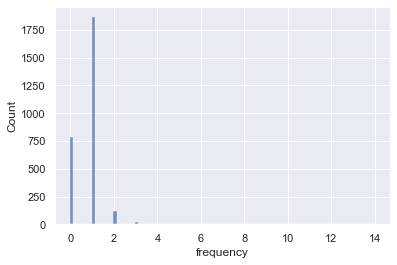

In [7]:
sb.histplot(data = summary, x="frequency")


# Freq. taken from first purchase onwards, meaning that if Freq = 1, the customer has already purchased twice

### Can see that there is still a number of customers with Freq = 0, let's find out why

In [8]:
sdata.head(10)

,customer_unique_id,order_purchase_timestamp,price
0,004288347e5e88a27ded2bb23747066c,2017-07-27 14:13:03,229.99
1,004288347e5e88a27ded2bb23747066c,2018-01-14 07:36:54,87.90
2,00a39521eb40f7012db50455bf083460,2018-06-03 10:12:57,11.55
3,00a39521eb40f7012db50455bf083460,2018-05-23 20:14:21,69.90
4,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:23,69.90
5,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:23,69.90
6,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:22,29.90
7,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:22,29.90
8,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:23,69.90
9,00cc12a6d8b578b8ebd21ea4e2ae8b27,2017-03-21 19:25:23,69.90


In [9]:
summary.head()

,customer_unique_id,frequency,recency,T,monetary_value
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.90
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.55
2,00cc12a6d8b578b8ebd21ea4e2ae8b27,0.0,0.0,525.0,0.00
3,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.90
4,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.88


### We can see that customer id 00cc12a6d8b578b8ebd21ea4e2ae8b27 has freq = 0, because his purchase timing is very close to each other - (19:25:23 & 19:25:22), hence we will ignore all such cases and assume they are not retained customers

In [10]:
# Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 2801 subjects, a: 2.13, alpha: 157.32, b: 0.29, r: 1.16>

In [11]:
# Model summary
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.160974,0.093043,0.978610,1.343339
alpha,157.323714,18.144622,121.760254,192.887174
a,2.125269,0.484670,1.175316,3.075222
b,0.293555,0.073463,0.149568,0.437541


In [12]:
# Compute the customer alive probability
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head(10)

,customer_unique_id,frequency,recency,T,monetary_value,probability_alive
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.90,0.042640
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.55,0.053582
2,00cc12a6d8b578b8ebd21ea4e2ae8b27,0.0,0.0,525.0,0.00,1.000000
3,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.90,0.047191
4,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.88,0.048872
5,012452d40dafae4df401bced74cdb490,1.0,330.0,436.0,1320.00,0.082800
6,012a218df8995d3ec3bb221828360c86,1.0,42.0,113.0,1369.90,0.066731
7,013ef03e0f3f408dd9bf555e4edcdc0a,1.0,29.0,68.0,59.90,0.083916
8,013f4353d26bb05dc6652f1269458d8d,1.0,4.0,277.0,256.00,0.015988
9,015557c9912277312b9073947804a7ba,1.0,39.0,523.0,59.90,0.009329


<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

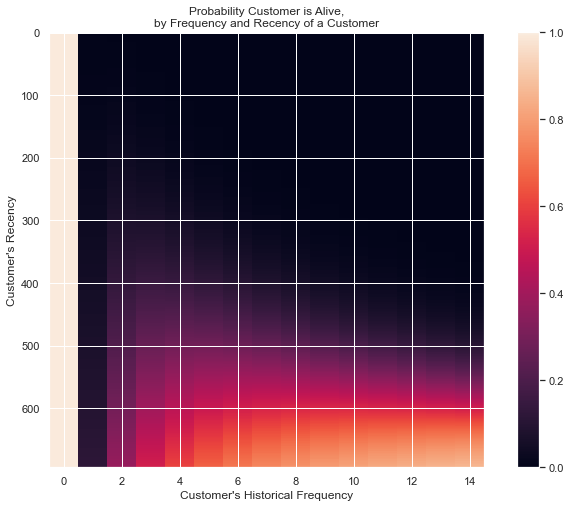

In [13]:
# Visual representation of relationship between recency and frequency
from lifetimes.plotting import plot_probability_alive_matrix

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [14]:
#Predict future transaction for the next 30 days based on historical dataa
t = 30
summary['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']),2)
summary.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,index,customer_unique_id,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,1551,8d50f5eadf50201ccdcedfb9e2ac8455,14.0,428.0,436.0,48.195,0.835836,0.61
1,622,394ac4de8f3acb14253c177f0e15bc58,4.0,236.0,249.0,176.900,0.567154,0.20
2,2426,dc813062e0fc23409cd255f7f53c7074,5.0,418.0,423.0,163.552,0.656989,0.20
3,1254,72e05cde2a8e5d8f08ca3ef3bcfadc63,0.0,0.0,11.0,0.000,1.000000,0.18
4,2047,b948343ff2e4e183e27e22ca63968d2b,0.0,0.0,12.0,0.000,1.000000,0.18
5,1623,931a4a1a3e2cf8b4b4d33922f1469dbe,0.0,0.0,11.0,0.000,1.000000,0.18
6,2357,d649357bd5b1b116bf9662f41259db37,0.0,0.0,6.0,0.000,1.000000,0.18
7,50,059e7585d8fcd2430a33375bdbcbb990,0.0,0.0,9.0,0.000,1.000000,0.18
8,1734,9b475216704f39cb18ce448648b995e1,0.0,0.0,18.0,0.000,1.000000,0.17
9,1284,7580e539c3d74ce5ff3946877db01dd2,0.0,0.0,14.0,0.000,1.000000,0.17


In [15]:
# Checking the relationship between frequency and monetary_value
return_customers_summary = summary[summary['frequency']>0]
print(return_customers_summary.shape)
return_customers_summary.head()

(2015, 7)


,customer_unique_id,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.90,0.042640,0.00
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.55,0.053582,0.01
3,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.90,0.047191,0.01
4,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.88,0.048872,0.01
5,012452d40dafae4df401bced74cdb490,1.0,330.0,436.0,1320.00,0.082800,0.01


# Using Gamma Gamma Model 

In [16]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'],
       return_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2015 subjects, p: 8.00, q: 0.99, v: 7.56>

In [18]:
# Calculating the conditional expected average profit for each customer per transaction
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_sales'] = ggf.conditional_expected_average_profit(summary['frequency'],
                                       summary['monetary_value'])
summary.head()

,customer_unique_id,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.90,0.042640,0.00,95.618031
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.55,0.053582,0.01,19.144075
3,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.90,0.047191,0.01,71.579066
4,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.88,0.048872,0.01,235.825290
5,012452d40dafae4df401bced74cdb490,1.0,330.0,436.0,1320.00,0.082800,0.01,1329.718362


In [19]:
# Checking the expected average value and the actual average value in the data to make sure the values are good
print(f"Expected Average Sales: {summary['exp_avg_sales'].mean()}")
print(f"Actual Average Sales: {summary['monetary_value'].mean()}")

Expected Average Sales: 296.2688305063302
Actual Average Sales: 288.55097526881957


In [20]:
# Predicting Customer Lifetime Value for the next 30 days
summary['predicted_clv'] =      ggf.customer_lifetime_value(bgf,
                                                               summary['frequency'],
                                                               summary['recency'],
                                                               summary['T'],
                                                               summary['monetary_value'],
                                                               time=1,     # lifetime in months
                                                               freq='D',   # frequency in which the data is present(T)      
                                                               discount_rate=0.01) # discount rate
summary.head()

,customer_unique_id,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.90,0.042640,0.00,95.618031,0.448267
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.55,0.053582,0.01,19.144075,0.231999
3,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.90,0.047191,0.01,71.579066,0.572376
4,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.88,0.048872,0.01,235.825290,1.326227
5,012452d40dafae4df401bced74cdb490,1.0,330.0,436.0,1320.00,0.082800,0.01,1329.718362,11.347272


In [21]:
summary['manual_predicted_clv'] = summary['pred_num_txn'] * summary['exp_avg_sales']
summary.head()

,customer_unique_id,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.90,0.042640,0.00,95.618031,0.448267,0.000000
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.55,0.053582,0.01,19.144075,0.231999,0.191441
3,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.90,0.047191,0.01,71.579066,0.572376,0.715791
4,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.88,0.048872,0.01,235.825290,1.326227,2.358253
5,012452d40dafae4df401bced74cdb490,1.0,330.0,436.0,1320.00,0.082800,0.01,1329.718362,11.347272,13.297184


In [22]:
# CLV in terms of profit (profit margin is 10%)
profit_margin = 0.1
summary['clv_profit'] = summary['predicted_clv'] * profit_margin

summary.head(10)

,customer_unique_id,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,clv_profit
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.90,0.042640,0.00,95.618031,0.448267,0.000000,0.044827
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.55,0.053582,0.01,19.144075,0.231999,0.191441,0.023200
3,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.90,0.047191,0.01,71.579066,0.572376,0.715791,0.057238
4,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.88,0.048872,0.01,235.825290,1.326227,2.358253,0.132623
5,012452d40dafae4df401bced74cdb490,1.0,330.0,436.0,1320.00,0.082800,0.01,1329.718362,11.347272,13.297184,1.134727
6,012a218df8995d3ec3bb221828360c86,1.0,42.0,113.0,1369.90,0.066731,0.01,1379.699375,19.711841,13.796994,1.971184
7,013ef03e0f3f408dd9bf555e4edcdc0a,1.0,29.0,68.0,59.90,0.083916,0.02,67.572572,1.428427,1.351451,0.142843
8,013f4353d26bb05dc6652f1269458d8d,1.0,4.0,277.0,256.00,0.015988,0.00,263.990943,0.584135,0.000000,0.058414
9,015557c9912277312b9073947804a7ba,1.0,39.0,523.0,59.90,0.009329,0.00,67.572572,0.057006,0.000000,0.005701
10,0178b244a5c281fb2ade54038dd4b161,1.0,444.0,475.0,356.94,0.110247,0.01,365.094821,3.903874,3.650948,0.390387


<AxesSubplot:xlabel='predicted_clv'>

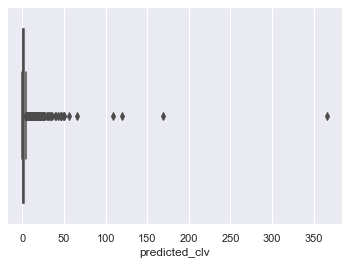

In [23]:
sb.boxplot(data=summary, x = 'predicted_clv')

<AxesSubplot:xlabel='predicted_clv', ylabel='Count'>

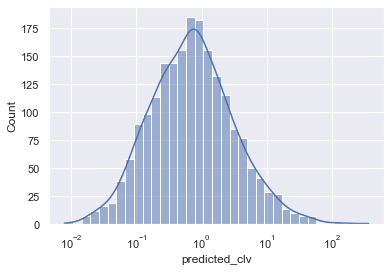

In [24]:
sb.histplot(data=summary, x = 'predicted_clv', log_scale = 10, kde = True)

<AxesSubplot:xlabel='predicted_clv', ylabel='Count'>

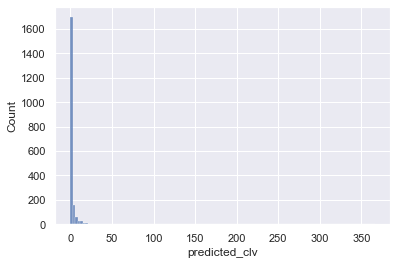

In [25]:
sb.histplot(data=summary, x = 'predicted_clv', binwidth = 3)

In [26]:

summary.drop(columns = summary.columns[0], inplace = True)

In [27]:
summary

,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,clv_profit
0,1.0,171.0,397.0,87.900,0.042640,0.00,95.618031,0.448267,0.000000,0.044827
1,1.0,11.0,97.0,11.550,0.053582,0.01,19.144075,0.231999,0.191441,0.023200
3,1.0,60.0,192.0,63.900,0.047191,0.01,71.579066,0.572376,0.715791,0.057238
4,1.0,177.0,371.0,227.880,0.048872,0.01,235.825290,1.326227,2.358253,0.132623
5,1.0,330.0,436.0,1320.000,0.082800,0.01,1329.718362,11.347272,13.297184,1.134727
...,...,...,...,...,...,...,...,...,...,...
2793,4.0,242.0,310.0,369.850,0.407697,0.13,371.891459,46.676690,48.345890,4.667669
2795,1.0,88.0,251.0,89.900,0.043916,0.01,97.621278,0.628549,0.976213,0.062855
2796,1.0,33.0,127.0,220.640,0.054838,0.01,228.573536,2.563879,2.285735,0.256388
2798,1.0,186.0,461.0,99.900,0.037292,0.00,107.637513,0.397728,0.000000,0.039773


In [28]:
summary.to_csv("CLVsummary.csv")

In [29]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   frequency             2015 non-null   float64
 1   recency               2015 non-null   float64
 2   T                     2015 non-null   float64
 3   monetary_value        2015 non-null   float64
 4   probability_alive     2015 non-null   float64
 5   pred_num_txn          2015 non-null   float64
 6   exp_avg_sales         2015 non-null   float64
 7   predicted_clv         2015 non-null   float64
 8   manual_predicted_clv  2015 non-null   float64
 9   clv_profit            2015 non-null   float64
dtypes: float64(10)
memory usage: 173.2 KB
